<font color="#CC3D3D"><p>
# Cross-Validation

In [1]:
import warnings

warnings.simplefilter("ignore")

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

# 'data', 'target', 'target_names', 'images', 'DESCR' 필드로 구성
digits.keys()

# digits.data는 이미지 속성을, digits.target는 클래스 레이블(0~9)을 갖고 있음

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

2

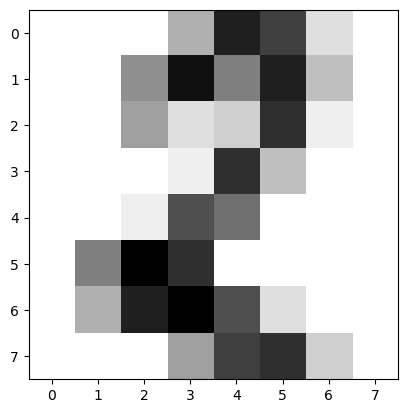

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# digits.data는 1차원 데이터이기 때문에 이미지를 도식하려면 2차원으로 변경해야 함.
plt.imshow(digits.data[50].reshape(8,8), cmap=plt.cm.gray_r)
digits.target[50]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

In [6]:
X_train.shape

(1347, 64)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()
#model = LogisticRegression()
#model = DecisionTreeClassifier()

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='accuracy'); scores

array([0.98518519, 0.9962963 , 0.9739777 , 0.98513011, 0.98513011])

In [9]:
# Change k
scores = cross_val_score(model, X_train, y_train, cv=30); scores

array([0.97777778, 1.        , 0.97777778, 0.97777778, 0.97777778,
       1.        , 1.        , 0.97777778, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.93333333, 0.97777778, 1.        , 0.97777778, 1.        ,
       1.        , 0.95555556, 0.97777778, 1.        , 0.95555556,
       0.97777778, 1.        , 0.97727273, 1.        , 1.        ])

In [10]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.987
Std: 0.017
Min: 0.933
Max: 1.000


### LOOCV(Leave-One-Out Cross-Validation)
<img align="left" src="https://www.researchgate.net/profile/Nikolaos_Chlis/publication/266617511/figure/fig11/AS:295705362092036@1447513060277/Leave-One-Out-Cross-Validation.png" width=500 height=400 alt="Decision Tree">

In [11]:
# LOOCV is very time-consuming => useful in small data

from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.9881217520415738

### Shuffle-Split Cross-Validation   
<img align="left" src="https://t1.daumcdn.net/cfile/tistory/99B45B3B5A5BE4D715" width=900 height=700 alt="Decision Tree">

In [12]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.4, n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=sscv)
scores.mean()

0.9710682492581603

<font color="#CC3D3D"><p>
# End